## We have 83 celebrities, each with 100 images for training (i.e. 8300 total) and about 5546 images in test set.

## With such little training data, we use 
* VGG16 pretrained model upto the bottleneck layer 
* Add a dense, dropout and softmax layer
* Re-train the model with good accuracy scores

In [ ]:
import zipfile

In [0]:
train_archive = zipfile.ZipFile("PATH_TO/trainvgg160.zip",'r')
test_archive = zipfile.ZipFile("PATH_TO/testvgg160.zip",'r')

In [0]:
train_archive.extractall("./images/train_images/")
test_archive.extractall("./images/test_images/")

In [6]:
import numpy as np
from keras.applications import VGG16

import numpy as np
import os
import PIL
import time

from IPython import display

Using TensorFlow backend.


In [0]:
image_size = 160

# Load a pre-trained VGG16 Model.

In [8]:
#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 3s 0us/step


In [9]:
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False

for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f36e54c1c88> False
<keras.layers.convolutional.Conv2D object at 0x7f36a90b8da0> False
<keras.layers.convolutional.Conv2D object at 0x7f36a90b8c18> False
<keras.layers.pooling.MaxPooling2D object at 0x7f36a90dae48> False
<keras.layers.convolutional.Conv2D object at 0x7f36a90744e0> False
<keras.layers.convolutional.Conv2D object at 0x7f36a90a72e8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f36a903d9e8> False
<keras.layers.convolutional.Conv2D object at 0x7f36a903d4a8> False
<keras.layers.convolutional.Conv2D object at 0x7f36a906b208> False
<keras.layers.convolutional.Conv2D object at 0x7f36a9001cc0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f36a9018e10> False
<keras.layers.convolutional.Conv2D object at 0x7f36a90294a8> False
<keras.layers.convolutional.Conv2D object at 0x7f36a8fdc160> False
<keras.layers.convolutional.Conv2D object at 0x7f36a8fee7b8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f36a8f8ab38>

In [10]:
from keras import models
from keras import layers
from keras import optimizers
 
# Create a Keras Sequential Model
model = models.Sequential()
 
# Add the vgg16 convolutional base model
model.add(vgg_conv)
 
# Add new layers, a 1024 dim Dense layer, 50% Dropout and Softmax layer with 83 celebrities
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(83, activation='softmax'))


# Show a summary of the model. Check the number of trainable parameters
model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 5, 5, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              13108224  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 83)                85075     
Total params: 27,907,987
Trainable params: 20,272,723
Non-trainable params: 7,635,264
_________________________________________________________________


# This is a very deep conv net

In [0]:
train_dir = "./images/train_images/trainvgg160"
validation_dir = "./images/test_images/testvgg160/"

In [0]:
from keras.preprocessing.image import ImageDataGenerator, load_img

# Create a Data Generator for both Test and Train

In [13]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# Change the batchsize according to your system RAM
train_batchsize = 128
val_batchsize = 10
 
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 8300 images belonging to 83 classes.
Found 5546 images belonging to 83 classes.


In [0]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# The model below is loaded, in case more training is required when an epoch ends. At the end of each epoch, however, we will save the intermediate model.

In [0]:
from keras.models import load_model
model = load_model('./vgg_2.h5')

In [21]:
# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)
 
# Save the model
model.save('vgg_3.h5')

Epoch 1/10
65/64 [==============================] - 115s 2s/step - loss: 0.7402 - acc: 0.7838 - val_loss: 1.2256 - val_acc: 0.6980
Epoch 2/10
65/64 [==============================] - 106s 2s/step - loss: 0.6932 - acc: 0.7969 - val_loss: 1.2380 - val_acc: 0.6926
Epoch 3/10
65/64 [==============================] - 105s 2s/step - loss: 0.6652 - acc: 0.8036 - val_loss: 1.1090 - val_acc: 0.7036
Epoch 4/10
65/64 [==============================] - 105s 2s/step - loss: 0.5867 - acc: 0.8305 - val_loss: 1.2158 - val_acc: 0.6931
Epoch 5/10
65/64 [==============================] - 106s 2s/step - loss: 0.5498 - acc: 0.8365 - val_loss: 1.2312 - val_acc: 0.6933
Epoch 6/10
65/64 [==============================] - 106s 2s/step - loss: 0.5270 - acc: 0.8442 - val_loss: 1.1523 - val_acc: 0.7079
Epoch 7/10
65/64 [==============================] - 105s 2s/step - loss: 0.4858 - acc: 0.8558 - val_loss: 1.3546 - val_acc: 0.6803
Epoch 8/10
65/64 [==============================] - 106s 2s/step - loss: 0.4360 - a

# We note that the training and validation accuracies increase. This means that the model is re-training well.
# Let's see the plots now.

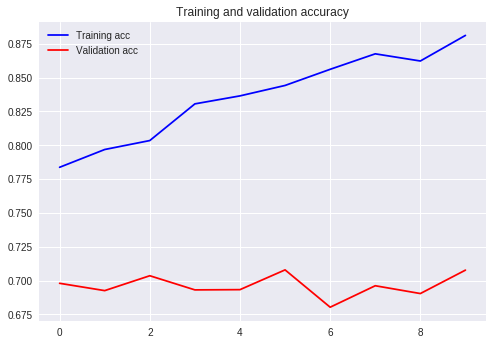

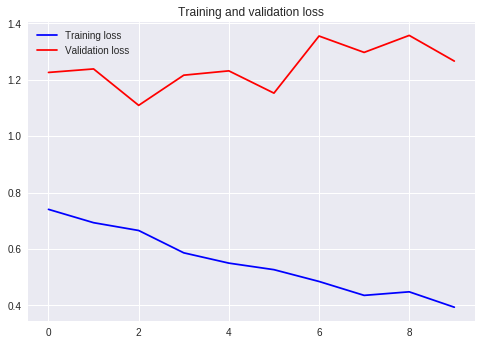

In [23]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [25]:
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)
 
# Get the filenames from the generator
fnames = validation_generator.filenames
 
# Get the ground truth from generator
ground_truth = validation_generator.classes
 
# Get the label to class mapping from the generator
label2index = validation_generator.class_indices
 
# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())
predictions = model.predict_generator(validation_generator, steps=validation_generator.samples/validation_generator.batch_size,verbose=1)

Found 5546 images belonging to 83 classes.
555/554 [==============================] - 45s 81ms/step


# Let's calculate the top 1,5 accuracies for Test data

In [26]:
top_preds = []
for item in predictions:
  top = np.argsort(item)[-1:][::-1]
  top_preds.append(top)

accurates = []
for i,item in enumerate(ground_truth):
  if item in top_preds[i]:
    accurates.append(1)
  else:
    accurates.append(0)
    
np.round(100*sum(accurates)/len(accurates),4)

70.7717

In [27]:
top_5_preds = []
for item in predictions:
  top_5 = np.argsort(item)[-5:][::-1]
  top_5_preds.append(top_5)

accurates_5 = []
for i,item in enumerate(ground_truth):
  if item in top_5_preds[i]:
    accurates_5.append(1)
  else:
    accurates_5.append(0)
    
np.round(100*sum(accurates_5)/len(accurates_5),4)

90.9845

In [0]:
predictions = model.predict_generator(validation_generator, steps=validation_generator.samples/validation_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)
 
errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),validation_generator.samples))


# Let's see a few misclassifications

In [ ]:
for i in range(len(errors)):
    pred_class = np.argmax(predictions[errors[i]])
    pred_label = idx2label[pred_class]
     
    title = 'Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
        fnames[errors[i]].split('/')[0],
        pred_label,
        predictions[errors[i]][pred_class])
     
    original = load_img('{}/{}'.format(validation_dir,fnames[errors[i]]))
    plt.figure(figsize=[5,5])
    plt.axis('off')
    plt.title(title)
    plt.imshow(original)
    plt.show()
    if i > 50:
      break